In [11]:
import os
from phathom import io
from phathom.registration.registration import detect_blobs_parallel
import matplotlib.pyplot as plt
import numpy as np

In [2]:
working_dir = '/home/jswaney/coregistration'

In [3]:
zarr_path = 'moving/zarr_stack/1_1_1'
image = io.zarr.open(os.path.join(working_dir,
                                  zarr_path), 
                     nested=True, 
                     mode='r')
image.shape

(4058, 12385, 7310)

In [4]:
chunk = image[500:1500, 6800:7800, 3000:4000]

In [6]:
chunk_path = 'moving/chunk'
chunks = (100, 100, 100)

z_arr_out = io.zarr.new_zarr(os.path.join(working_dir,
                                  chunk_path), 
                             chunk.shape, 
                             chunks, 
                             chunk.dtype)

z_arr_out[:] = chunk

In [39]:
# Detect blobs
sigma = (1.2, 2.0, 2.0)  # (1.2, 2.0, 2.0) previously
min_distance = 2  # 3 previously
min_intensity = 500
nb_workers = 8
overlap = 8

blobs = detect_blobs_parallel(z_arr_out, 
                              sigma, 
                              min_distance, 
                              min_intensity, 
                              nb_workers, 
                              overlap)

print('found {} blobs in fixed image'.format(len(blobs)))

100%|██████████| 1000/1000 [00:23<00:00, 42.15it/s]


found 223905 blobs in fixed image


<IPython.core.display.Javascript object>


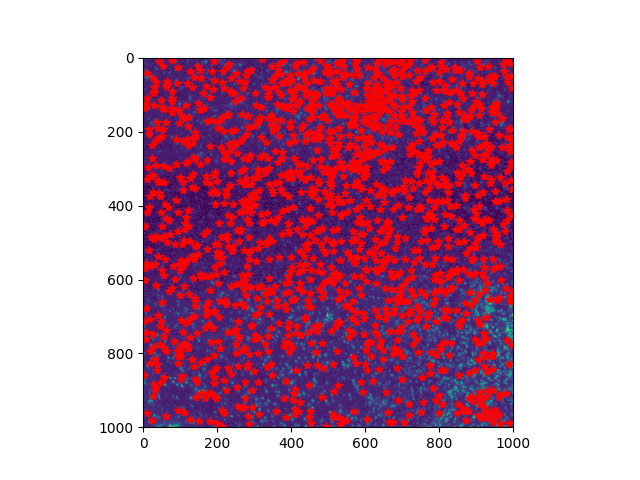

In [40]:
%matplotlib notebook
z = 500
d = 3
idx = np.where(np.abs(blobs[:, 0]-z) < d)
slice_blobs = blobs[idx]
mip = chunk[z-d:z+d].max(axis=0)
plt.imshow(chunk[z])
plt.plot(slice_blobs[:,2], slice_blobs[:,1], 'r*')
plt.show()